In [2]:
import numpy as np
import pylab as pl
import enaml

with enaml.imports():
    from psi.application.io import pika
    from psi.controller.calibration import tone

%matplotlib inline

In [3]:
io_manifest = pika.IOManifest()
audio_engine = io_manifest.find('NI_audio')
frequencies = [250, 500, 1000, 2000, 4000, 8000, 16000, 32000]

In [4]:
mic_channel = audio_engine.get_channel('microphone_channel')
mic_channel.gain = 40

In [29]:
result = tone.tone_sens(
    frequencies=frequencies,
    engine=audio_engine,
    ao_channel_name='speaker_1',
    ai_channel_names=['microphone_channel'],
    gain=-40,
    debug=True,
    duration=0.1,
    iti=0,
    trim=0.01,
)

In [30]:
w = result.loc[('microphone_channel', 2000), 'waveform']

In [31]:
def tone_power_conv(s, fs, frequency, window=None):
    frequency_shape = tuple([Ellipsis] + [np.newaxis]*s.ndim)
    frequency = np.asarray(frequency)[frequency_shape]
    s = signal.detrend(s, type='linear', axis=-1)
    n = s.shape[-1]
    if window is not None:
        w = signal.get_window(window, n)
        s = w/w.mean()*s
    t = np.arange(n)/fs
    r = 2.0*s*np.exp(-1.0j*(2.0*np.pi*t*frequency))
    return r

In [32]:
from scipy import signal
r = tone_power_conv(w, 100e3, 2000)

In [42]:
f = util.psd_freq(w, 100e3)

In [45]:
np.flatnonzero(f == 2000)

array([160], dtype=int32)

In [46]:
c = util.csd(w, 100e3,)
np.angle(c[..., 160])

array([-2.53917079, -2.53947194])

In [39]:
np.angle(r)[..., 0]

array([ 3.14159265,  3.14159265])

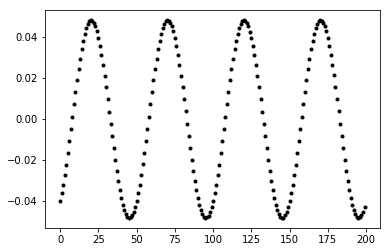

In [35]:
pl.plot(w[1, :200], 'k.')

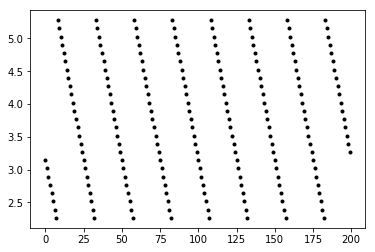

In [37]:
#pl.plot(np.unwrap(np.angle(r))[0, :200], 'k.')

In [6]:
c = result.loc['microphone_channel', ['rms', 'thd', 'spl', 'norm_spl']]
print(c)

                rms         thd         spl    norm_spl
frequency                                              
250        0.006768    1.461421   87.156295  117.156295
500        0.039462    3.261313  101.905409  131.905409
1000       0.057336    2.142706  104.185083  134.185083
2000       0.083099   17.473877  104.442316  134.442316
4000       0.047972  115.051948  104.491930  134.491930
8000       0.015682    0.261288   98.980658  128.980658
16000      0.000556    0.098645   67.748932   97.748932
32000      0.000482    0.336676   64.688032   94.688032


In [ ]:
f, axes = pl.subplots(len(frequencies), 2, 
                      sharex=True, figsize=(12, 12))

for frequency, (ax1, ax2) in zip(frequencies, axes):
    w = result.loc['microphone_channel', frequency]['waveform']
    ax1.set_title(frequency)
    ax2.set_title(frequency)
    ax1.plot(w[0])
    ax2.plot(w[1])
    ax1.axis(xmin=0, xmax=2000)